# get sample data from torch vision and upload to s3

In [9]:
from torchvision import datasets, transforms

transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

dataset1 = datasets.MNIST('./data', train=True, download=True,
                    transform=transform)
dataset2 = datasets.MNIST('./data', train=False,
                    transform=transform)

In [7]:
dataset1.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [32]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (2, 10)


def show_digit(img, caption="", subplot=None):
    if subplot == None:
        _, (subplot) = plt.subplots(1, 1)
    imgr = img.reshape((28, 28))
    subplot.axis("off")
    subplot.imshow(imgr, cmap="gray")
    plt.title(caption)

In [7]:
import pandas as pd

In [17]:
dataset1.data.numpy().reshape((-1, 28 * 28)).shape, dataset1.targets.numpy().shape

((60000, 784), (60000,))

In [5]:
df_X1 = pd.DataFrame(dataset1.data.numpy().reshape(60000, -1))
df_X1.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


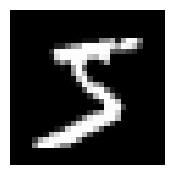

In [7]:
show_digit(df_X1.iloc[0].to_numpy())

In [9]:
pd.DataFrame(dataset1.targets.numpy().reshape(-1))

,0
0,5
1,0
2,4
3,1
4,9
...,...
59995,8
59996,3
59997,5
59998,6


In [12]:
import numpy as np

df_X1 = pd.DataFrame(dataset1.data.numpy().reshape(60000, -1))
df_Y1 = pd.DataFrame(dataset1.targets.numpy().reshape(-1), columns=["label"])

df_combined = pd.concat([df_X1,df_Y1], axis=1)
# df_combined.set_index(idx, inplace=True)
df_combined.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [13]:
df_combined.to_parquet("mnist_train.parquet", index=False)

In [11]:
dataset2.data.numpy().shape

(10000, 28, 28)

In [12]:
import numpy as np

df_X2 = pd.DataFrame(dataset2.data.numpy().reshape(10000, -1))
df_Y2 = pd.DataFrame(dataset2.targets.numpy().reshape(-1), columns=["label"])

df_combined2 = pd.concat([df_X2,df_Y2], axis=1)
# df_combined.set_index(idx, inplace=True)
df_combined2.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [14]:
df_combined2.to_parquet("mnist_test.parquet", index=False)

In [14]:
pd.read_parquet("mnist_train.parquet").head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [3]:
import boto3
obj = (boto3.client("s3")
    .list_objects(
        Bucket=f"sagemaker-ap-southeast-2-993630082325",
        # Key="sagemaker",
    )
    )

In [5]:
# upload to s3
s3 = boto3.client("s3")
s3.upload_file(
    Filename="mnist_train.parquet",
    Bucket="sagemaker-ap-southeast-2-993630082325",
    Key="datasets/mnist/original/train.parquet",
)

In [15]:
# upload to s3
s3 = boto3.client("s3")
s3.upload_file(
    Filename="mnist_test.parquet",
    Bucket="sagemaker-ap-southeast-2-993630082325",
    Key="datasets/mnist/original/test.parquet",
)

# now try to train the model

In [ ]:
import sagemaker
from sagemaker.pytorch import PyTorch

os.environ["AWS_DEFAULT_REGION"] = "ap-southeast-2"

role = "arn:aws:iam::993630082325:role/service-role/AmazonSageMaker-ExecutionRole-20250516T191424"



In [38]:
estimator = PyTorch(
    entry_point="mnist.py",
    source_dir="templates",
    role=role,
    framework_version="2.6",
    py_version="py312",
    train_instance_count=1,
    train_instance_type="ml.m5.large",
    hyperparameters={"epochs": 1},
    output_path="s3://sagemaker-ap-southeast-2-993630082325/models/mnist",
    env={
        'SAGEMAKER_REQUIREMENTS': 'requirements.txt',
    }
)

estimator.fit(
    inputs={
        "train": "s3://sagemaker-ap-southeast-2-993630082325/datasets/mnist/original/train.parquet",
        "test": "s3://sagemaker-ap-southeast-2-993630082325/datasets/mnist/original/test.parquet",
    },
    wait=True,
)

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker.telemetry.telemetry_logging:SageMaker Python SDK will collect telemetry to help us better understand our user's needs, diagnose issues, and deliver additional features.
To opt out of telemetry, please disable via TelemetryOptOut parameter in SDK defaults config. For more information, refer to https://sagemaker.readthedocs.io/en/stable/overview.html#configuring-and-using-defaults-with-the-sagemaker-python-sdk.
INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker:Creating training-job with name: pytorch-training-2025-05-18-10-19-30-954


2025-05-18 10:19:35 Starting - Starting the training job...
2025-05-18 10:20:09 Downloading - Downloading input data......
2025-05-18 10:20:54 Downloading - Downloading the training image.....bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2025-05-18 10:22:05,691 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2025-05-18 10:22:05,692 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2025-05-18 10:22:05,692 sagemaker-training-toolkit INFO     No Neurons detected (normal if no neurons installed)
2025-05-18 10:22:05,702 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2025-05-18 10:22:05,770 sagemaker_pytorch_container.training INFO     Invoking user training script.
2025-05-18 10:22:07,578 sagemaker-training-toolkit INFO     Installing dependencies from requirements.txt

2025-05-18 10:22:00 Training - Training 

In [ ]:
estimator.create_model(
    entry_point="mnist.py",
    source_dir="templates", role=role, image_uri=estimator.training_image_uri(), env={

In [39]:
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer

predictor = estimator.deploy(
    initial_instance_count=1,
    instance_type="ml.m5.large",
    serializer=CSVSerializer(),
    deserializer=JSONDeserializer(),
)

INFO:sagemaker:Repacking model artifact (s3://sagemaker-ap-southeast-2-993630082325/models/mnist/pytorch-training-2025-05-18-10-19-30-954/output/model.tar.gz), script artifact (s3://sagemaker-ap-southeast-2-993630082325/pytorch-training-2025-05-18-10-19-30-954/source/sourcedir.tar.gz), and dependencies ([]) into single tar.gz file located at s3://sagemaker-ap-southeast-2-993630082325/pytorch-training-2025-05-18-10-28-19-226/model.tar.gz. This may take some time depending on model size...


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:4                                                                                    │
│                                                                                                  │
│    1 from sagemaker.serializers import CSVSerializer                                             │
│    2 from sagemaker.deserializers import JSONDeserializer                                        │
│    3                                                                                             │
│ ❱  4 predictor = estimator.deploy(                                                               │
│    5 │   initial_instance_count=1,                                                               │
│    6 │   instance_type="ml.m5.large",                                                            │
│    7 │   serializer=CSVSerializer(),                                                             │
│                                                                                                  │
│ /workspaces/aws-mlops-playground/.venv/lib/python3.10/site-packages/sagemaker/estimator.py:1722  │
│ in deploy                                                                                        │
│                                                                                                  │
│   1719 │   │   │   inference_tags=format_tags(tags), training_tags=self.tags                     │
│   1720 │   │   )                                                                                 │
│   1721 │   │                                                                                     │
│ ❱ 1722 │   │   return model.deploy(                                                              │
│   1723 │   │   │   instance_type=instance_type,                                                  │
│   1724 │   │   │   initial_instance_count=initial_instance_count,                                │
│   1725 │   │   │   serializer=serializer,                                                        │
│                                                                                                  │
│ /workspaces/aws-mlops-playground/.venv/lib/python3.10/site-packages/sagemaker/model.py:1737 in   │
│ deploy                                                                                           │
│                                                                                                  │
│   1734 │   │   │   return None                                                                   │
│   1735 │   │                                                                                     │
│   1736 │   │   else:  # existing single model endpoint path                                      │
│ ❱ 1737 │   │   │   self._create_sagemaker_model(                                                 │
│   1738 │   │   │   │   instance_type=instance_type,                                              │
│   1739 │   │   │   │   accelerator_type=accelerator_type,                                        │
│   1740 │   │   │   │   tags=tags,                                                                │
│                                                                                                  │
│ /workspaces/aws-mlops-playground/.venv/lib/python3.10/site-packages/sagemaker/model.py:936 in    │
│ _create_sagemaker_model                                                                          │
│                                                                                                  │
│    933 │   │   │   if self.name is None and model_package.name is not None:                      │
│    934 │   │   │   │   self.name = model_package.name                                            │
│    935 │   │   else:                                                                             │
│ ❱  936 │   │   │   container_def = self.prepare_container_d